In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import cv2 as cv

baseDir = "C:/Users/Roman/Dropbox/hda/ComputerVision/Uebungen 2/"

In [3]:
# load test image

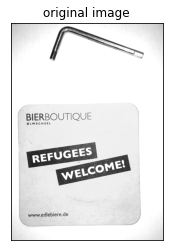

In [4]:
# Load a color image in grayscale
img = cv.imread(baseDir + 'pics/IMG_6003.JPG',0)
f = plt.imshow(img, cmap = 'gray'),plt.title("original image"), plt.xticks([]), plt.yticks([]), plt.show()

In [5]:
img.shape

(3009, 2101)

## split the image into reference object and probe object

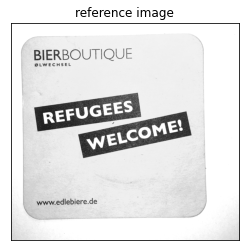

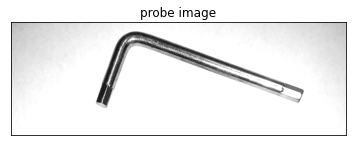

In [6]:
imgProbe = img[:709,]
imgRef   = img[1009:,]
f = plt.imshow(imgRef, cmap = 'gray'),plt.title("reference image"), plt.xticks([]), plt.yticks([]), plt.show()
f = plt.imshow(imgProbe, cmap = 'gray'),plt.title("probe image"), plt.xticks([]), plt.yticks([]), plt.show()

# process reference image

## binarize

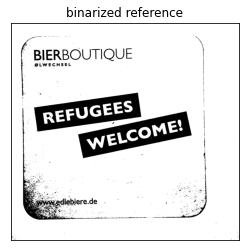

In [7]:
threshold = 220
bimg = imgRef.copy()
bimg[bimg < threshold] = 0
bimg[bimg>= threshold] = 255
f = plt.imshow(bimg, cmap = 'gray'),plt.title("binarized reference"), plt.xticks([]), plt.yticks([]), plt.show()

## edges

I use Canny edge detector, with an automatic evaluation of the thresholds, retrieved from: https://www.pyimagesearch.com/2015/04/06/zero-parameter-automatic-canny-edge-detection-with-python-and-opencv/

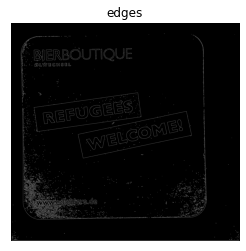

In [10]:
import argparse
import glob
def auto_canny(image, sigma=0.33):
    # compute the median of the single channel pixel intensities
    v = np.median(image)

    # apply automatic Canny edge detection using the computed median
    lower = int(max(0, (1.0 - sigma) * v))
    upper = int(min(255, (1.0 + sigma) * v))
    edged = cv.Canny(image, lower, upper)

    # return the edged image
    return edged

edges = auto_canny(bimg)

f = plt.imshow(edges, cmap = 'gray'),plt.title("edges"), plt.xticks([]), plt.yticks([]), plt.show()

extracted 12 lines!


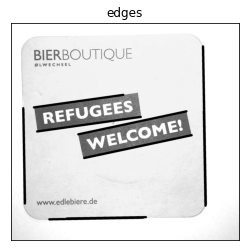

In [11]:
img2 = imgRef.copy()
lines = cv.HoughLinesP(edges,  1, np.pi/180, 20, maxLineGap=50, minLineLength = 700) # threshold (last parameter) may be evaluated
print("extracted " + str(len(lines)) + " lines!")

lineSizes = []
if lines is not None:
    for line in lines:
        x1, y1, x2, y2 = line[0]
        lineSizes.append(np.sqrt((x2-x1)**2 + (y2-y1)**2)) # write the line distances in px
        cv.line(img2, (x1, y1), (x2, y2), (0, 255, 0), 20)
        
f = plt.imshow(img2, cmap = 'gray'),plt.title("edges"), plt.xticks([]), plt.yticks([]), plt.show()

### how long is the longest edge?

Text(0.1, 1434.7234934300059, 'longest line')

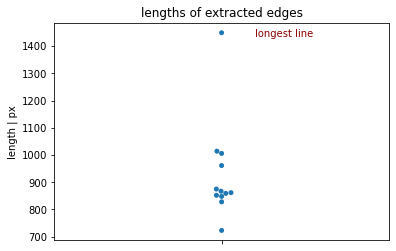

In [12]:
sns.swarmplot(lineSizes, orient="vertical")
plt.ylabel("length | px")
plt.title("lengths of extracted edges")
plt.text(x=.1, y = np.max(lineSizes)*.99, s = "longest line", color = "darkred" )

In [15]:
# externally measure the reference line
refLineMM = 80 # left out the round-ish edges

mmPpx = refLineMM / np.max(lineSizes)
print("Longest line in image is " + str(np.max(lineSizes)) + " px")
print("Each pixel is around " + str(np.round(mmPpx,2)) + " mm.")

Longest line in image is 1449.215649929299 px
Each pixel is around 0.06 mm.


In [17]:
1449/80

18.1125

#### probe images

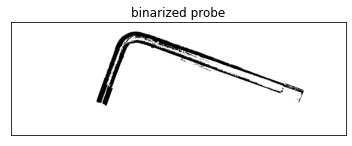

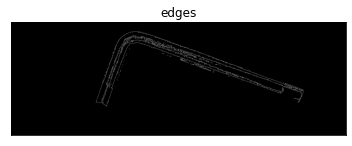

extracted 25 lines!


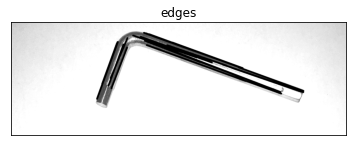

In [18]:
threshold = 150
bimg = imgProbe.copy()
bimg[bimg < threshold] = 0
bimg[bimg>= threshold] = 255
f = plt.imshow(bimg, cmap = 'gray'),plt.title("binarized probe"), plt.xticks([]), plt.yticks([]), plt.show()

edges = auto_canny(bimg)
f = plt.imshow(edges, cmap = 'gray'),plt.title("edges"), plt.xticks([]), plt.yticks([]), plt.show()

imgProbe2 = imgProbe.copy() / 10
lines = cv.HoughLinesP(edges,  1, np.pi/180, 20, maxLineGap=25, minLineLength = 250) # threshold (last parameter) may be evaluated
print("extracted " + str(len(lines)) + " lines!")

lineSizes = []
if lines is not None:
    for line in lines:
        x1, y1, x2, y2 = line[0]
        lineSizes.append(np.sqrt((x2-x1)**2 + (y2-y1)**2)) # write the line distances in px
        cv.line(imgProbe2, (x1, y1), (x2, y2), (0, 255, 0), 10)
        
f = plt.imshow(imgProbe2, cmap = 'gray'),plt.title("edges"), plt.xticks([]), plt.yticks([]), plt.show()

### how long is the longest edge?

Text(0.5, 1.0, 'lengths of edges')

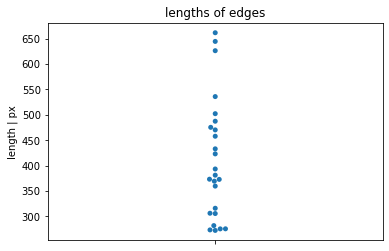

In [19]:
sns.swarmplot(lineSizes, orient="vertical")
plt.ylabel("length | px")
plt.title("lengths of edges")

In [22]:
def outputLine(inpList):
    """
    takes a list of pixel distances as input
    """
    out = [i*mmPpx for i in inpList]
    return out
    
lineSizesMM = outputLine(lineSizes)

Text(0.5, 1.0, 'lengths of edges')

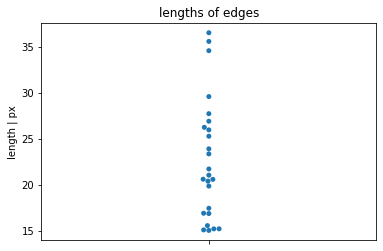

In [23]:
sns.swarmplot(lineSizesMM, orient="vertical")
plt.ylabel("length | px")
plt.title("lengths of edges")

In [53]:
print(lines)

[[[260 109 262 109]]

 [[106 161 119 159]]

 [[254  99 256  99]]

 [[239 111 242 111]]

 [[ 77 145  78 145]]

 [[297 100 300 100]]

 [[123 136 125 136]]

 [[197 121 200 121]]

 [[312 128 314 128]]

 [[277 131 278 131]]

 [[324  95 328  95]]

 [[161 154 170 153]]

 [[199 110 233 104]]

 [[161 126 179 123]]

 [[129 157 132 157]]

 [[208 119 211 119]]

 [[146 131 165 128]]

 [[212 142 217 141]]

 [[199 147 202 147]]

 [[270 135 273 135]]

 [[361  88 361  88]]

 [[152 153 154 153]]

 [[265 106 284 103]]

 [[169 150 172 150]]

 [[318 127 320 127]]

 [[303 101 305 101]]

 [[247 101 249 101]]

 [[274 134 284 133]]

 [[289  93 292  93]]

 [[262 134 266 133]]

 [[212 118 226 116]]

 [[294 128 296 128]]

 [[321 123 323 123]]

 [[170 116 188 113]]

 [[221 143 224 143]]

 [[306 126 309 126]]

 [[182 124 185 124]]

 [[134 123 138 123]]

 [[300 130 303 130]]

 [[239 140 260 137]]

 [[243 137 246 137]]

 [[293 103 295 103]]

 [[135 156 137 156]]

 [[145 157 147 157]]

 [[314  99 317  99]]

 [[427  77

(array([[  0.,   0.,   0., ...,   0.,   0., 246.],
        [  0.,   0.,   0., ...,   0.,   0., 246.],
        [  0.,   0.,   0., ...,   0.,   0., 246.],
        ...,
        [  0.,   0.,   0., ...,   0.,   0., 246.],
        [  0.,   0.,   0., ...,   0.,   0., 246.],
        [  0.,   0.,   0., ...,   0.,   0., 246.]]),
 array([ 19. ,  42.6,  66.2,  89.8, 113.4, 137. , 160.6, 184.2, 207.8,
        231.4, 255. ]),
 <a list of 454 Lists of Patches objects>)

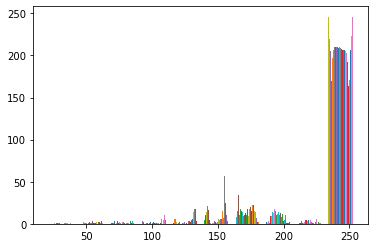

In [29]:
plt.hist(img)

In [38]:
acImg = auto_canny(img)

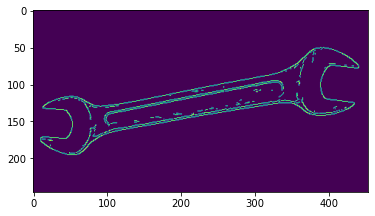